Computing Gower distance on training data...


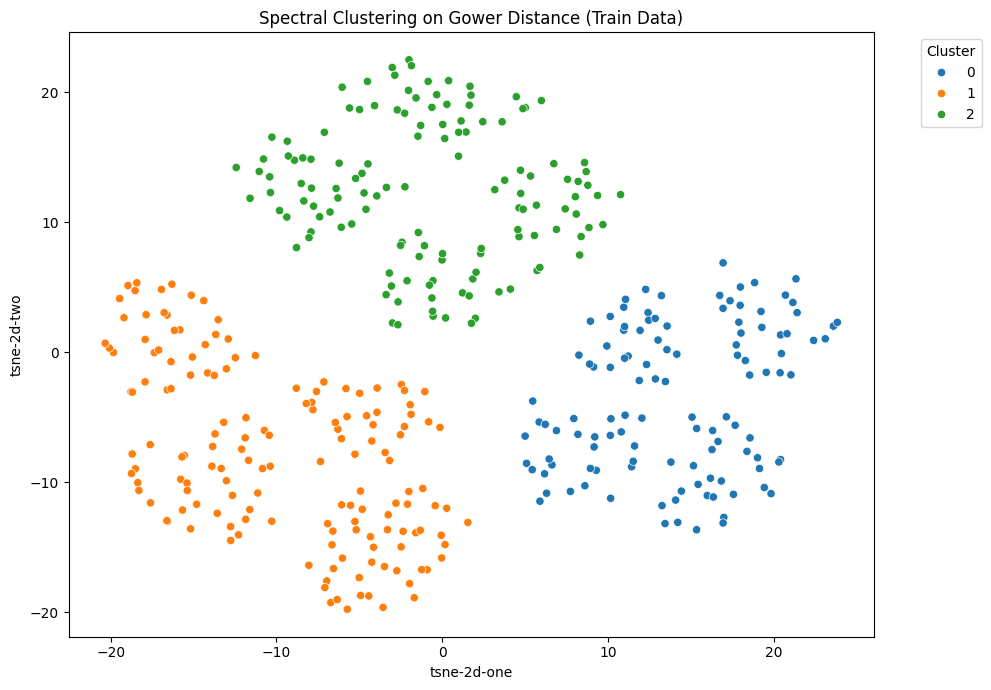

Cluster counts in training data:
Spectral_Cluster
1    153
2    131
0    116
Name: count, dtype: int64


In [2]:
import os
import pandas as pd
import numpy as np
import gower
from sklearn.model_selection import train_test_split
from sklearn.cluster import SpectralClustering
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("student_sleep_patterns.csv")

# Drop Student_ID if exists
if 'Student_ID' in df.columns:
    df.drop(columns=["Student_ID"], inplace=True)

# Define categorical and numerical columns
categorical_cols = ['Gender', 'University_Year']
numerical_cols = ['Age', 'Sleep_Duration', 'Study_Hours', 'Screen_Time',
                  'Caffeine_Intake', 'Physical_Activity', 'Weekday_Sleep_Start',
                  'Weekend_Sleep_Start', 'Weekday_Sleep_End', 'Weekend_Sleep_End']

# Convert categorical columns to string type
df[categorical_cols] = df[categorical_cols].astype(str)

# Split into train and test (80/20)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=None)

# Compute Gower distance matrix on train data
gower_data = train_df[categorical_cols + numerical_cols]
print("Computing Gower distance on training data...")
gower_dist = gower.gower_matrix(gower_data)

# Convert distance matrix to similarity matrix for spectral clustering
# similarity = 1 - distance (since Gower distance is in [0,1])
affinity_matrix = 1 - gower_dist

# Perform spectral clustering
n_clusters = 3  # Set your number of clusters here or use heuristic methods
spectral = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', random_state=42)
train_df['Spectral_Cluster'] = spectral.fit_predict(affinity_matrix)

# Use t-SNE for visualization of the distance matrix
tsne = TSNE(metric='precomputed', n_components=2, random_state=42, init='random')
tsne_results = tsne.fit_transform(gower_dist)
train_df['tsne-2d-one'] = tsne_results[:, 0]
train_df['tsne-2d-two'] = tsne_results[:, 1]

# Create presentation folder if not exists
output_folder = "presentation"
os.makedirs(output_folder, exist_ok=True)

# Plotting
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='tsne-2d-one', y='tsne-2d-two',
    hue='Spectral_Cluster',
    palette='tab10',
    data=train_df,
    legend='full'
)
plt.title("Spectral Clustering on Gower Distance (Train Data)")
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

# Save plot
plt.tight_layout()
plt.savefig(os.path.join(output_folder, "spectral_clustering_tsne_plot.png"))
plt.show()

# Print cluster counts
print("Cluster counts in training data:")
print(train_df['Spectral_Cluster'].value_counts())


In [3]:
import numpy as np

# Check if affinity matrix is symmetric
print("Symmetric affinity matrix:", np.allclose(affinity_matrix, affinity_matrix.T))

# Check if all values are non-negative
print("Non-negative values in affinity matrix:", np.all(affinity_matrix >= 0))

# Check range of values
print("Affinity matrix min:", affinity_matrix.min())
print("Affinity matrix max:", affinity_matrix.max())


Symmetric affinity matrix: True
Non-negative values in affinity matrix: True
Affinity matrix min: 0.23901778
Affinity matrix max: 1.0


In [5]:
!pip install networkx


   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/2.0 MB ? eta -:--:--
   ---------- ----------------------------- 0.5/2.0 MB 970.1 kB/s eta 0:00:02
   --------------- ------------------------ 0.8/2.0 MB 1.1 MB/s eta 0:00:02
   ------------------------------ --------- 1.6/2.0 MB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 2.0/2.0 MB 1.8 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import networkx as nx

# Convert affinity matrix to graph (threshold edges to remove very weak connections if needed)
threshold = 0.1  # example threshold
adjacency_matrix = (affinity_matrix > threshold).astype(int)

G = nx.from_numpy_array(adjacency_matrix)
print("Number of connected components:", nx.number_connected_components(G))


Number of connected components: 1
